## Tipos de aprendizaje

* Aprendizaje supervisado
    * Clasificación.
        * Clasificación binaria.
        * Clasificación multiclase.
    * Regresión.

* Aprendizaje no supervisado.
    * Clustering.
    * Reducción de la dimensionalidad.
    * Detección de anomalías.

* Aprendizaje semi-supervisado
* Aprendizaje por refuerzo

### Aprendizaje no supervisado

Aunque la mayoría de las aplicaciones del Machine Learning se basan hoy en día en el aprendizaje supervisado (y, como resultado, es ahí donde se realizan las mayores inversiones), la inmensa mayoría de los datos disponibles no están etiquetados: tenemos las características de entrada ***X***, pero no tenemos las etiquetas ***y***.

#### Clustering

El clustering busca particionar el set de datos en grupos, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que los puntos dentro de un clúster sean muy similares y se diferencien con puntos de otros clusters.

##### K-Means

El algoritmo K-Means trata de encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. El algoritmo alterna tres pasos en su ejecución:

1. Se determina un número de clusters.
2. Busca alrededor de cada centro los puntos más cercanos.
3. Recalcula el centro como el promedio de los puntos dentro de ese cluster.

![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

In [1]:
import mglearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

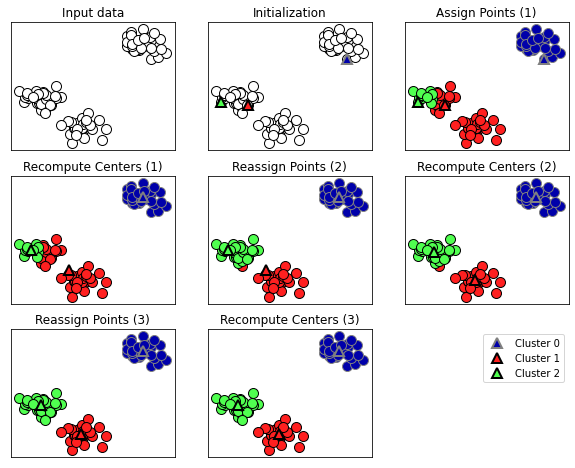

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [3]:
auto = pd.read_csv('https://raw.githubusercontent.com/stivenlopezg/Diplomado-Python/master/data/mpg.csv')
auto.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
184,25.0,4,140.0,92.0,2572,14.9,76,usa,capri ii
49,23.0,4,122.0,86.0,2220,14.0,71,usa,mercury capri 2000


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
numerical_features = auto.select_dtypes(include='number').columns.tolist()
numerical_features.remove('model_year')
numerical_features

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [5]:
imputer = SimpleImputer(strategy='median')

X = auto[numerical_features]

In [6]:
imputer.statistics_

AttributeError: 'SimpleImputer' object has no attribute 'statistics_'

In [7]:
imputer.fit(X)

SimpleImputer(strategy='median')

In [8]:
imputer.statistics_

array([  23. ,    4. ,  148.5,   93.5, 2803.5,   15.5])

In [10]:
X = pd.DataFrame(imputer.transform(X), columns=numerical_features)

X.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [13]:
scaler = StandardScaler()

scaler.fit(X)

print(scaler.mean_)
print(scaler.scale_)

X = pd.DataFrame(scaler.transform(X), columns=numerical_features)

[  23.51457286    5.45477387  193.4258794   104.3040201  2970.42462312
   15.56809045]
[  7.80615906   1.69886596 104.13876353  38.17457629 845.77723352
   2.75422232]


In [14]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822


## K-Means

In [15]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

KMeans(n_clusters=6)

In [16]:
kmeans.cluster_centers_

array([[-0.557705  ,  0.38209149,  0.32676272, -0.11427662,  0.35057747,
         0.42417534],
       [ 0.62174331, -0.80923033, -0.79995073, -0.87817661, -0.66117247,
         1.59896662],
       [-1.28983112,  1.49819126,  1.8894339 ,  2.17829371,  1.62263316,
        -1.54278451],
       [ 0.2057167 , -0.77403924, -0.65401847, -0.28780453, -0.51974196,
        -0.21328899],
       [ 1.35192939, -0.84122755, -0.91288682, -0.87006274, -1.05559287,
         0.13587038],
       [-1.03178213,  1.47950466,  1.22153401,  1.05939648,  1.21744408,
        -0.73474316]])

In [17]:
X['cluster'] = kmeans.predict(X)

X.sample(n=15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
36,-0.578335,0.320935,0.543257,-0.427091,0.392036,-0.024722,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,5
276,-0.245264,-0.856321,-0.695475,0.280186,-0.207412,0.047894,3
90,-1.475063,1.498191,2.262118,2.454408,2.342905,-1.477038,2
167,0.702705,-0.856321,-0.925936,-0.767632,-0.945195,0.156817,4
106,-1.475063,1.498191,1.503514,1.982890,1.807303,-1.113959,2
94,-1.346959,1.498191,2.367746,2.899730,2.086336,-1.658577,2
161,-0.962647,0.320935,0.543257,0.018232,1.095531,1.064514,0
223,-1.026699,1.498191,1.196232,1.066049,1.382841,-0.678264,5
205,0.574601,-0.856321,-0.925936,-0.767632,-0.964113,0.302049,4


In [18]:
X['cluster'].value_counts()

3    93
4    78
0    77
5    63
1    50
2    37
Name: cluster, dtype: int64

In [19]:
kmeans.inertia_

366.4793116061771

## K Optimo

In [20]:
n_clusters = np.linspace(start=2, stop=10, num=5, dtype=int)

inertia = []

for n in n_clusters:
    inertia.append(KMeans(n_clusters=n).fit(X).inertia_)

inertia

[1918.7584395645688,
 743.9567756390261,
 366.4793116061771,
 314.67611560620617,
 278.2068460246408]

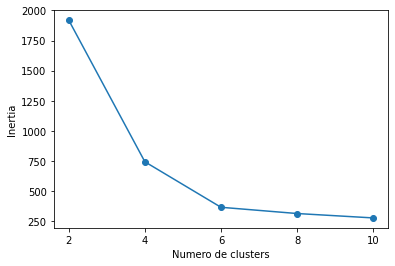

In [22]:
plt.plot(n_clusters, inertia, marker='o')
plt.xticks(n_clusters)
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
!pip install scikit-plot

In [23]:
from scikitplot.metrics import plot_silhouette

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

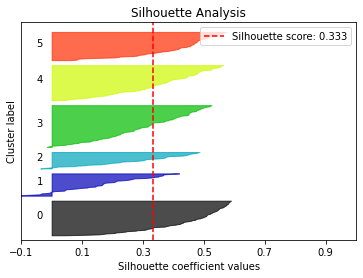

In [24]:
plot_silhouette(X.drop('cluster', axis=1), cluster_labels=X['cluster'])